## 이 부분은 강의 내용과 관계 없지만 여기서부터 실행 시키세요.(Time stamp 프로그램)

In [1]:
!pip3 install torch
!pip3 install torchvision

In [2]:
import time

a=[]

def timestamp():
    now = time.time()
    now = time.localtime(now)
    a.append(now)
    return

timestamp()

> 이 문서의 폰트크기는 브라우저 인쇄시 인쇄 배율 75%로 최적화 되어 있음


# 예제 1. MNIST  분류 : CNN (일반)

> <학습 목표>    
> - 파이토치 모듈 API 기반 직렬 결합 방식의 CNN 모델의 일반적인 제작 기법 이해

> < 코드 구성>   
> 1. 학습 데이터 구축   
>    (1) 학습테이터의 첫번째 이미지의 확인하기 
>    (2) 학습 데이터의 첫 100개 이미지 보기
> 2. 데이터셋 및 데이터로더 객체 생성   
> 3. CNN 모델 클래스 및 모델 성능 측정 함수 정의   
>    (1) CNN 모델 클래스   
>     (2) 학습된 모델의 추론 및 정확도 산출 함수   
> 4. 훈련된 모델 사용하기   
>     (1) 한 개의 입력 이미지 분류 하기   
>     (2) 검증용(테스트) 이미지 각각을 분류하여 잘못 분류된 이미지들 보기
>     (3) 훈련용 이미지 각각을 분류하여 잘못 분류된 이미지들 보기

In [3]:
# multi line 출력을 위한 셀 -- 필요시 주석해제 후 이 셀을 실행시키기 바람
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import torch
from torch import nn, optim
from torch.utils.data import (Dataset, DataLoader, TensorDataset)

from torchvision.datasets import MNIST
from torchvision import transforms
import tqdm

## 1. 학습 데이터셋 구축


In [5]:
##### 입력 샘플과  X와 목표치 D
mnist_train = MNIST("./",
                        train=True, download=True,
                        transform=transforms.ToTensor())

# 시험용  데이터 가져오기
mnist_test = MNIST("./",
                    train=False, download=True,
                    transform=transforms.ToTensor())

def data_info():
    print(len(mnist_train))
    print(len(mnist_test))
    print(mnist_train.classes)
    print(mnist_train.class_to_idx)

data_info()

60000
10000
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


### (1) 학습데이터의 첫번째 이미지의 확인하기

label = 5


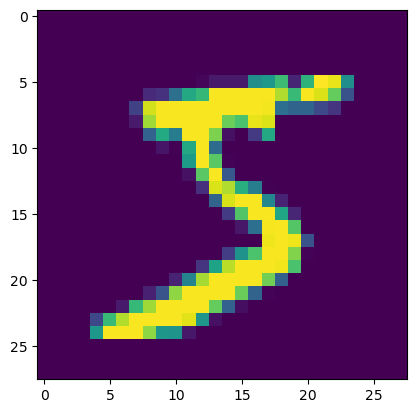

torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000,

In [6]:
img, label = mnist_train[0]
print("label =", label)
#plt.imshow(img.permute(1, 2, 0))
plt.imshow(torch.squeeze(img, dim=0))
plt.show()
print(img.size())
print(img)

In [7]:
timestamp()

### (2) 학습 데이터의 첫 100개 이미지 보기

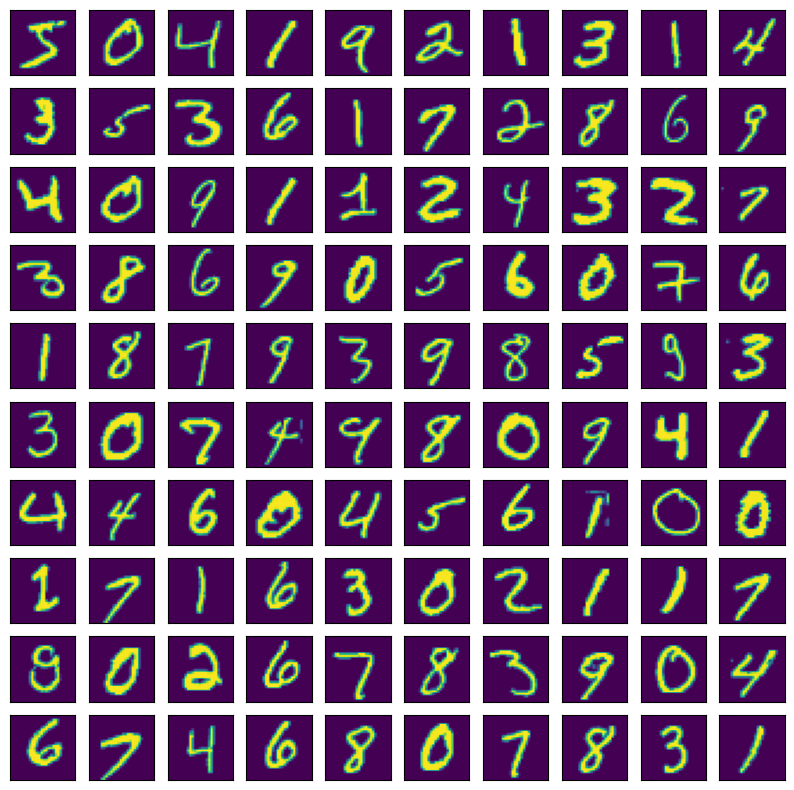

In [8]:
class_names = ['0', '1','2', '3', '4', '5', '6', '7', '8', '9']

fig = plt.figure(figsize=(10, 10))
i = 0
for img, label in mnist_train:
    ax = fig.add_subplot(10, 10, 1 + i, xticks=[], yticks=[])
    i = i + 1
    # plt.imshow(img.permute(1, 2, 0))
    plt.imshow(torch.squeeze(img, dim=0))
    if i == 100:
        break     

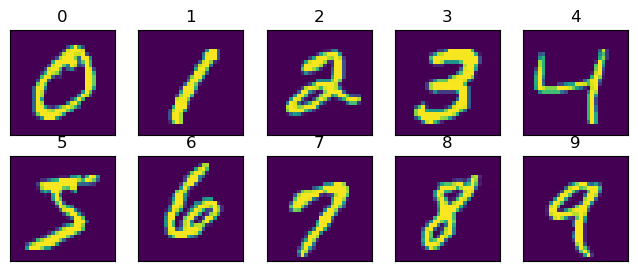

In [9]:
# 각 클래스별 첫번째 이미지 디스플레이 하기
class_names = ['0', '1','2', '3', '4', '5', '6', '7', '8', '9']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in mnist_train if label == i)
    # plt.imshow(img.permute(1, 2, 0))
    plt.imshow(torch.squeeze(img, dim=0))
plt.show()

## 2. 데이터로더 객체 생성
- GPU 실행을 위한 데이터 변환 내용도 들어 있으며, 필요시 주석해제 후 GPU 기반 실행 실습 요망

In [10]:
# 배치 크기가 128인 DataLoader를 각각 작성
batch_size=128
train_loader = DataLoader(mnist_train, 
                          batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(mnist_test,
                          batch_size=batch_size, shuffle=False)

In [11]:
timestamp()

## 3. CNN 모델 클래스 및 모델 성능 측정 함수 정의 

### (1) CNN 모델 클래스

In [12]:
## (N, C, H, W) Tensor를 (N, C*H*W)로 변형 계층 (합성곱 출력을 MLP에 전달할 때 사용)
class FlattenLayer(nn.Module):
    def forward(self, x):
        sizes = x.size()
 
        return x.view(sizes[0], -1)

## 2개의 컨볼루션 계층
    # conv1 : 1채널 입력, 32개 5×5 필터, conv2 : 32채널 입력, 64개 5×5 필터
    # Batch Normalization과 Dropout 적용
## 2개의 FC 채널
    # fc1은 Batch Normalization과 Dropout 적용
## 활성화함수는 최종 출력 계층만 제외하고 relu()를 사용

conv_net = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size= 5),  #  32 x 24 x 24
    nn.MaxPool2d(2),                   #  32 x 12 x 12
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Dropout2d(0.25),
    
    nn.Conv2d(32, 64, kernel_size= 5),  #  64 x 8 x 8
    nn.MaxPool2d(2),                    #  64 x 4 x 4
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.Dropout2d(0.25),
    
    FlattenLayer()
)

# 위 합성곱 계층들에 의한 최종이미지 크기 추출
test_input = torch.ones(1, 1, 28, 28)
conv_output_size = conv_net(test_input).size()[-1]

# 2 계층 MLP
fnn = nn.Sequential(
    nn.Linear(conv_output_size, 200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Dropout(0.25),
    nn.Linear(200, 10)
)
# 최종 CNN
model = nn.Sequential(
    conv_net,
    fnn
)

# ADAMS의 optimizer 생성
optimizer = optim.Adam(model.parameters())
#optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

# 크로스 엔트로피 오차 함수 생성
loss_fn = nn.CrossEntropyLoss()

### (2) 학습된 모델의 추론 및 정확도 산출 함수

In [13]:
# 추론 및 정확도 산출
def eval_model(model, data_loader, device="cpu"):
    # Dropout 및 BatchNorm을 무효화
    model.eval()
    ys = []
    ypreds = []
    for x, y in data_loader:
        # to 메서드로 계산을 실행할 디바이스로 전송
        x = x.to(device)
        y = y.to(device)
        # 확률이 가장 큰 클래스를 예측(리스트 2.1 참조)
        # 여기선 forward（추론） 계산이 전부이므로 자동 미분에
        # 필요한 처리는 off로 설정해서 불필요한 계산을 제거
        with torch.no_grad():
            _, y_pred = model(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)

    # 미니 배치 단위의 예측 결과 등을 하나로 묶는다
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)
    # 예측 정확도 계산
    acc = (ys == ypreds).float().sum() / len(ys)
    return acc.item()

In [14]:
timestamp()

## 3. CNN 훈련 
### (1) CNN 훈련 시키기
- 시간 상 4 에포크 분량 훈련 / cpu 환경

In [15]:
# 신경망의 모든 파라미터
device = "cpu"
#device = "cuda:0"

model.to(device)

# 훈련 실행
EPOCHS = 4

log_train_loss = []
log_train_acc = []
log_valid_acc = []

#opt = optimizer(model.parameters())

for epoch in range(EPOCHS):
    epoch_loss = 0.0
    # 신경망을 훈련 모드로 설정
    model.train()
    n = 0
    acc = 0
    i = 0
    # 시간이 많이 걸리므로 tqdm을 사용해서 진행바를 표시
    for i, (x_mb, d_mb) in tqdm.tqdm(enumerate(train_loader), total=len(train_loader)):
        x_mb = x_mb.to(device)
        d_mb = d_mb.to(device)
        h = model(x_mb)
        loss = loss_fn(h, d_mb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        n += len(x_mb)
        _, y_pred = h.max(1)
        acc += (d_mb == y_pred).sum().item()

    log_train_loss.append(epoch_loss / i)
    # 훈련 데이터의 예측 정확도
    log_train_acc.append(acc / n)

    # 검증 데이터의 예측 정확도
    log_valid_acc.append(eval_model(model, valid_loader, device))
    # epoch의 결과 표시
    print(epoch, log_train_loss[-1], log_train_acc[-1], log_valid_acc[-1], flush=True)

100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:26<00:00, 17.70it/s]


0 0.13650543064587456 0.9604833333333334 0.9882000088691711


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:26<00:00, 17.96it/s]


1 0.05550318531807449 0.98335 0.9907000064849854


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:26<00:00, 18.02it/s]


2 0.04054994016595217 0.9877833333333333 0.991599977016449


100%|████████████████████████████████████████████████████████████████████████████████| 469/469 [00:26<00:00, 17.70it/s]


3 0.03708684551589286 0.9881333333333333 0.9927999973297119


### (2) 최종 오차/정확도 출력 및 에포크별 오차/정확도 그래프 디스플레이 하기

최종 Training Accuracy = 0.9881   최종 Validation Accuracy = 0.9928


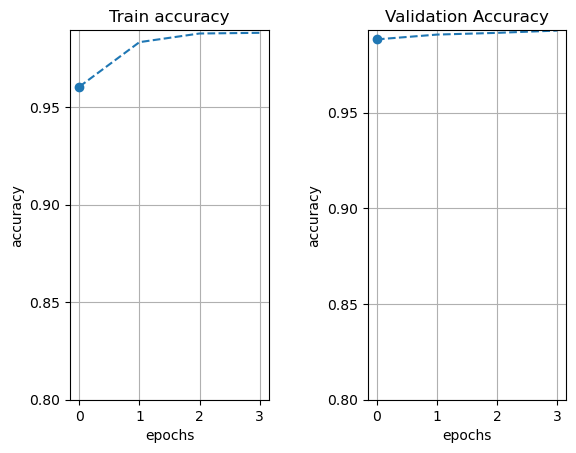

In [16]:
print("최종 Training Accuracy = %1.4f" % log_train_acc[-1], end='   ')
print("최종 Validation Accuracy = %1.4f" % log_valid_acc[-1])

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), log_train_acc, 'o--', markevery=10)
plt.title("Train accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xticks(range(0, EPOCHS, 1))
plt.yticks(np.arange(0.8, 1, 0.05))
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),log_valid_acc, 'o--', markevery=10)
plt.title("Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xticks(range(0, EPOCHS, 1))
plt.yticks(np.arange(0.8, 1, 0.05))
plt.grid()

plt.subplots_adjust(wspace=0.5)
plt.show()

## 4. 훈련된 모델 사용하기
### (1) 한 개의 입력 이미지 분류 하기

torch.Size([1, 28, 28])
label = 8
torch.Size([1, 1, 28, 28])
예측 = 8
정확하게 분류하였읍니다.


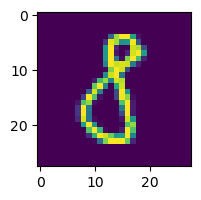

In [17]:
TEST_IMAGE_INDEX = 1200
img, label = mnist_test[TEST_IMAGE_INDEX]
print(img.size())
fig = plt.figure(figsize=(3,2))
plt.imshow(img.permute(1, 2, 0))
print("label =", label)

img = torch.unsqueeze(img, 0)  # 4 
print(img.size())
_, y_pred = model(img).max(1)
print("예측 =", y_pred.item())
if label == y_pred.item():
    print("정확하게 분류하였읍니다.")
else:
    print("분류를 제대로 하지 못했읍니다.")

### (2) 테스트 이미지 각각을 분류하여 잘못 분류된 이미지들 보기

분류 실패 이미지 개수 = 72


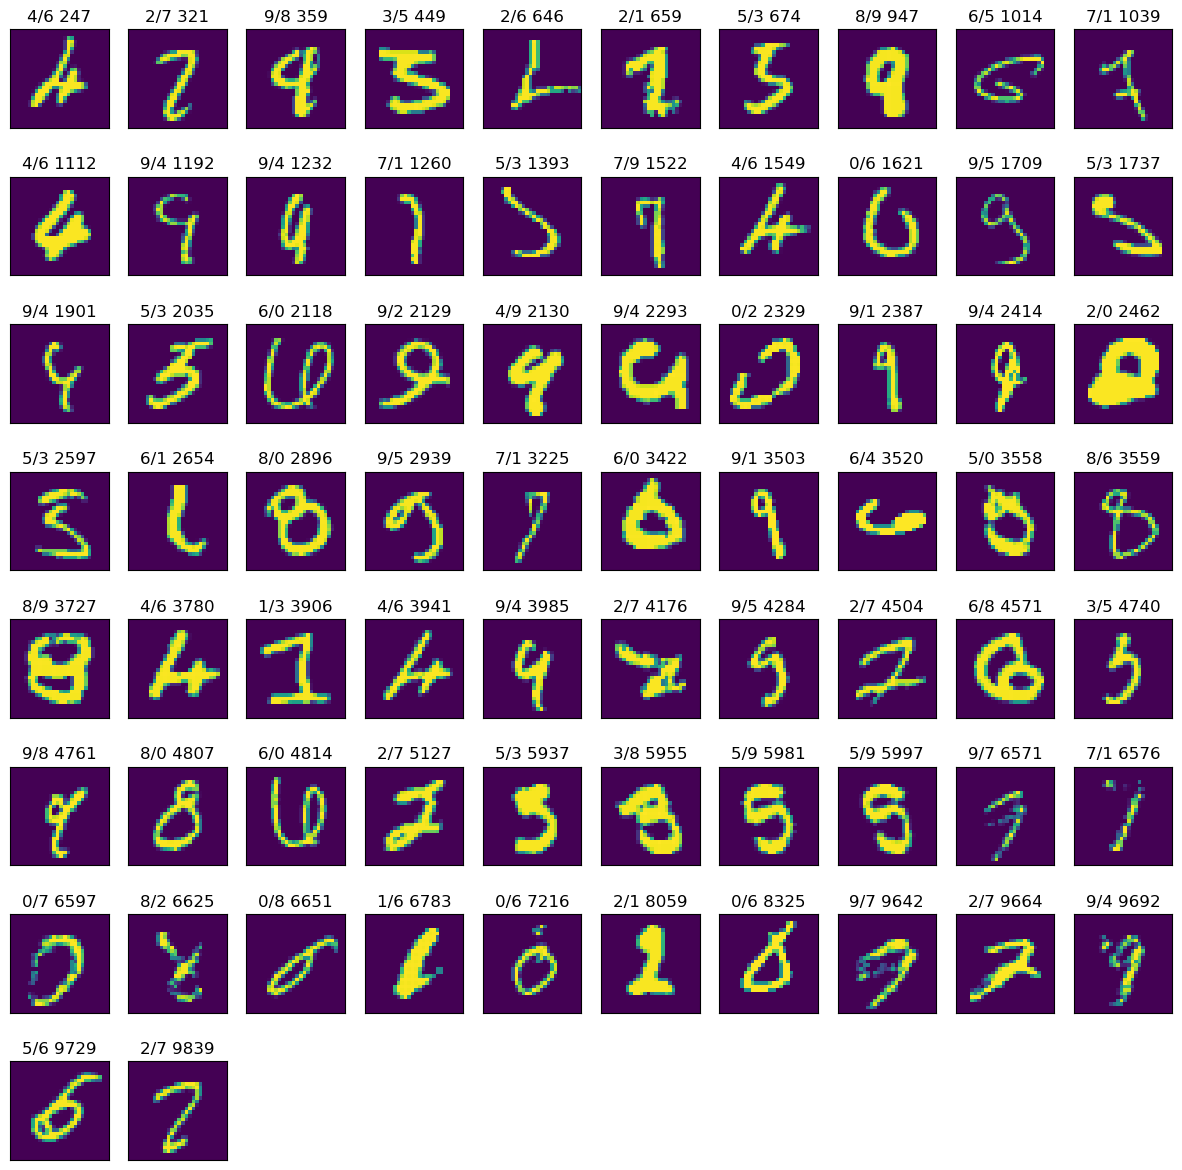

In [18]:
fail_list = []
fail_pred = []

i = 0
failures = 0
for img, label in mnist_test:
    img_org = img
    img = torch.unsqueeze(img, 0)  
    _, y_pred = model(img).max(1)
    if label == y_pred.item():
        i += 1
        continue
        
    failures +=1
    fail_list.append(i)
    fail_pred.append(y_pred.item())
    #print("%d, label=%d prediction=%d" % (i, label, y_pred.item()))
    i += 1

print("분류 실패 이미지 개수 = %d" % failures)
#print(fail_list)
#print(fail_pred)

row = failures // 10
if failures % 10 != 0:
    row += 1

fig = plt.figure(figsize=(15,15))

j = 0
for i in fail_list:
    img, label = mnist_test[i]
    ax = fig.add_subplot(row, 10, 1 + j, xticks=[], yticks=[])
    ax.set_title("{}/{} {}".format(label,fail_pred[j], i))  # label/prediction index
    plt.imshow(img.permute(1, 2, 0))
    j += 1
plt.show()

### (2) 훈련 이미지 각각을 분류하여 잘못 분류된 이미지들 보기

분류 실패 이미지 개수 = 200


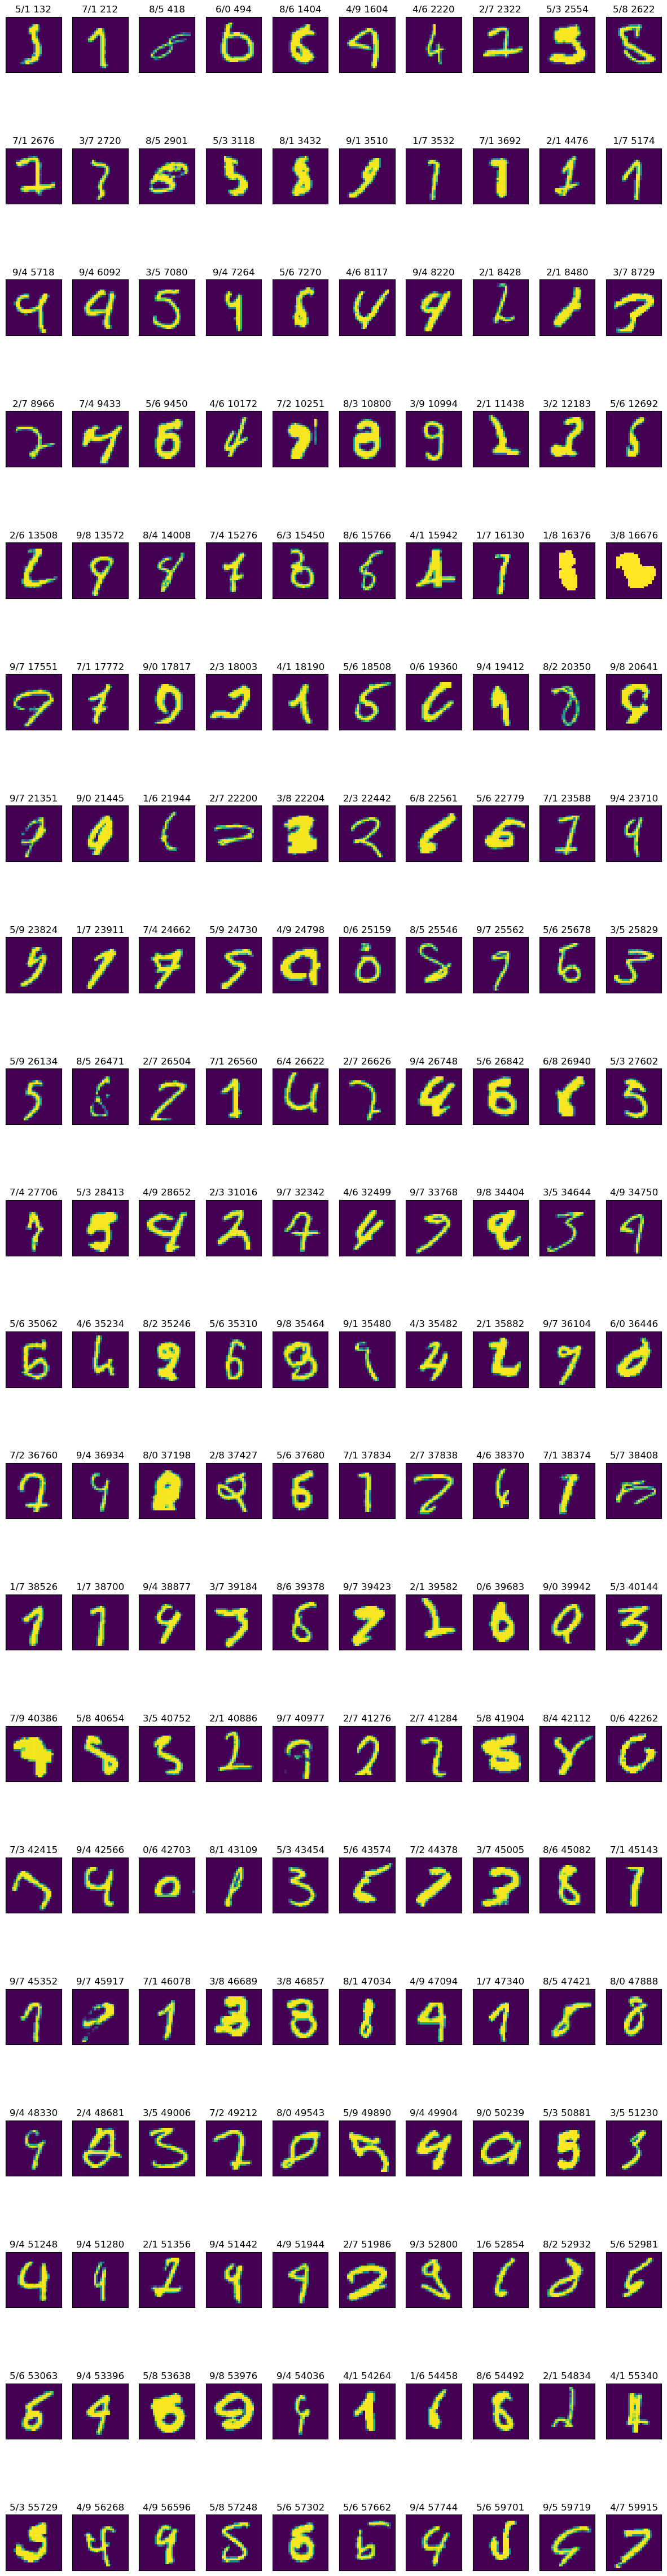

In [19]:
fail_list = []
fail_pred = []

i = 0
failures = 0
for img, label in mnist_train:
    img_org = img
    img = torch.unsqueeze(img, 0)  
    _, y_pred = model(img).max(1)
    if label == y_pred.item():
        i += 1
        continue
        
    failures +=1
    fail_list.append(i)
    fail_pred.append(y_pred.item())
    #print("%d, label=%d prediction=%d" % (i, label, y_pred.item()))
    i += 1

print("분류 실패 이미지 개수 = %d" % failures)
#print(fail_list)
#print(fail_pred)

row = failures // 10
if failures % 10 != 0:
    row += 1

fig = plt.figure(figsize=(15,60))

j = 0
for i in fail_list:
    img, label = mnist_train[i]
    ax = fig.add_subplot(row, 10, 1 + j, xticks=[], yticks=[])
    ax.set_title("{}/{} {}".format(label,fail_pred[j], i))  # label/prediction index
    plt.imshow(img.permute(1, 2, 0))
    j += 1
plt.show()

In [20]:
timestamp()

### 이 부분은 강의 내용과 관계 없는 부분이지만 끝까지 실행시키세요(Timestamp와 Mac address hash code 인쇄)

In [21]:
for i in a:
    now = time.strftime('%Y년 %#m월 %#d일 %#H시 %#M분 %#S초', i)
    print(now)

2023년 5월 6일 14시 6분 15초
2023년 5월 6일 14시 6분 39초
2023년 5월 6일 14시 6분 45초
2023년 5월 6일 14시 6분 46초
2023년 5월 6일 14시 9분 39초


In [22]:
from uuid import getnode as get_mac
mac = get_mac()
mac_addr=str(mac)
import hashlib
hash_object= hashlib.sha1(mac_addr.encode('utf-8'))
signature = int(hash_object.hexdigest(), 16) % 10**8
print(str(signature))

31719826
